# 10.6 回帰に正則化手法を使用する

### ノルムの話
#### ノルムの定義
$n$ 次元のベクトル $\vec{x} = (x_1, x_2, \cdots, x_n)$ および $1 \leq p \leq \infty$ となる $p$ に対して、
$$
\sqrt[p] {|x_1|^p + |x_2|^p + \cdots + |x_n|^p}
$$
を $\vec{x}$ の $L^p$ ノルムといい、$\|\vec{x}\|_p$ と書く。

#### つまるところ
- 要は色んな「大きさ」を表す量のこと
- よく使うのがL1ノルム、L2ノルム
  - $\|\vec{x}\|_1 = |x_1| + |x_2| + \cdots + |x_n|$: ただの絶対値の和（マンハッタン距離）
  - $\|\vec{x}\|_2 = \sqrt{x_1^2 + x_2^2 + \cdots + x_n^2}$: ユークリッド距離

In [64]:
from ipywidgets import interact
import numpy as np
import matplotlib.cm as cm

def Lp(x, y, lp=1):
    x = np.abs(x)
    y = np.abs(y)
    return (x**lp + y**lp)**(1./lp)

@interact(lp=(0.1, 5., 0.1))
def draw_lp_contour(lp=1):
    n = 200
    X, Y = np.meshgrid(np.linspace(-1, 1, n), np.linspace(-1, 1, n))
    Z = LP(X, Y, lp)
    interval = [i/10. -1 for i in range(21)]

    plt.figure(figsize=(5, 5))
    plt.contour(X, Y, Z, interval, alpha=1, cmap=cm.hsv_r)
    plt.title("Contour of LP{}".format(lp))
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.show()

### 正則化された線形回帰の最も一般的なアプローチ
- LASSO（Least Absolute Shrinkage and Selection Operator）
- リッジ回帰（Ridge Regression）
- Elastic Net

#### LASSO
- L1 項付きモデル
- 不要なパラメータを削りたいときによく使われる
$$
J(\vec{w})_{LASSO} = \sum_{i=1}^n (y^{(i)} - \hat{y}^{(i)})^2 + \lambda \|\vec{w} \|_1 \\
\lambda \|\vec{w} \|_1 = \lambda \sum^m_{j=1} | w_j |
$$

#### リッジ回帰
- L2 項付きモデル
- 過学習を抑えて汎化能力を上げる時によく使う
$$
J(\vec{w})_{Ridge} = \sum_{i=1}^n (y^{(i)} - \hat{y}^{(i)})^2 + \lambda \|\vec{w} \|^2_2 \\
\lambda \|\vec{w} \|^2_2 = \lambda \sum^m_{j=1} w^2_j
$$

#### Elastic Net
- L1 と L2 両方を使う（LASSO とリッジ回帰の折衷案）
$$
J(\vec{w})_{ElasticNet} = \sum_{i=1}^n (y^{(i)} - \hat{y}^{(i)})^2 + \lambda_1 \|\vec{w} \|^2_2 + \lambda_2 \|\vec{w} \|_1 \\
$$

### 使い方
```python
from sklearn.linear_model import Ridge, Lasso, ElasticNet
ridge = Ridge(1.0)
lasso = Lasso(1.0)
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
```

# 10.7 多項式回帰：線形回帰モデルから曲線を見出す

In [66]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0,
              586.0])[:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

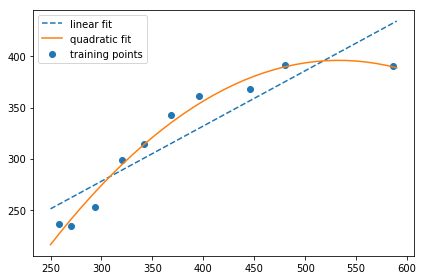

In [78]:
# fit linear features
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# fit quadratic features
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# plot results
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [70]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [75]:
print('Training MSE linear: %.3f, quadratic: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


### 10.7.1 Housing データセットで非線形関係をモデリングする

## データセット

### Housing データセット

- CRIM: 犯罪率
- ZN: 住宅区画の割合
- INDUS: 非商売業の土地面積の割合
- CHAS: チャールズ川沿いかどうか
- NOX: 窒素酸化物の濃度
- RM: 1戸あたりの平均部屋数
- AGE: 古い建物の割合
- DIS: 雇用権までの距離
- RAD: 幹線道路へのアクセス指数
- TAX: 所得税率
- PTRATIO: 教師あたりの生徒の数
- B: 黒人の割合
- LSTAT: 低所得者の割合
- MEDV: 住宅価格の中央値

In [65]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                 header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
              'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


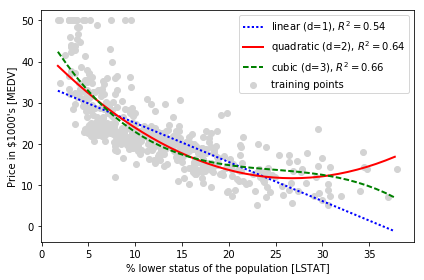

In [79]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

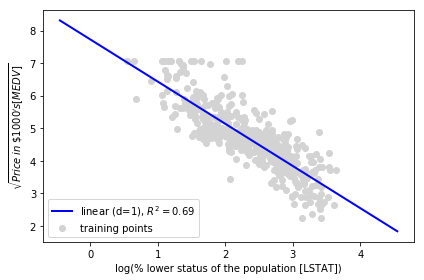

In [80]:
X = df[['LSTAT']].values
y = df['MEDV'].values

# transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
# plt.savefig('./figures/transform_example.png', dpi=300)
plt.show()

### 10.7.2 RandomForest を使って非線形関係に対処する

#### 決定木回帰

In [82]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return

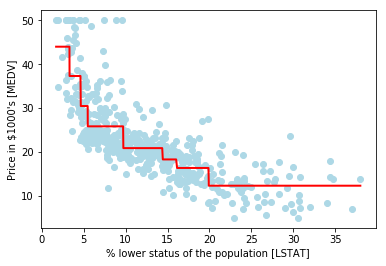

In [83]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
# plt.savefig('./figures/tree_regression.png', dpi=300)
plt.show()

#### RandomForest 回帰

In [85]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

In [86]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1.642, test: 11.052
R^2 train: 0.979, test: 0.878


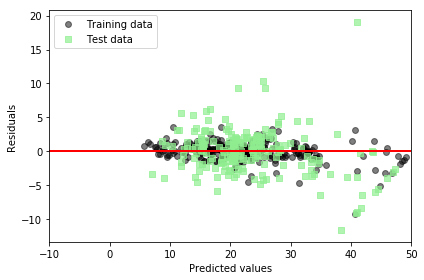

In [87]:
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='black', 
            marker='o', 
            s=35,
            alpha=0.5,
            label='Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='lightgreen', 
            marker='s', 
            s=35,
            alpha=0.7,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()